In [ ]:
import pandas as pd
import numpy as np

In [ ]:
np.set_printoptions(precision=4)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/okyx/clustering/master/Iris.csv')

In [ ]:
data.columns=['Id',0,1,2,3,'Species']

In [ ]:
data

,Id,0,1,2,3,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.Species = data.Species.map({'Iris-setosa':1,'Iris-virginica':3,'Iris-versicolor':2})

In [ ]:
X = data.copy()

In [ ]:
X

,Id,0,1,2,3,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [ ]:
y = X.pop('Species')

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int64

In [ ]:
X.pop('Id')

0        1
1        2
2        3
3        4
4        5
      ... 
145    146
146    147
147    148
148    149
149    150
Name: Id, Length: 150, dtype: int64

In [ ]:
X = X.values

Mean per class

In [ ]:
mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [5.006 3.418 1.464 0.244]

Mean Vector class 2: [5.936 2.77  4.26  1.326]

Mean Vector class 3: [6.588 2.974 5.552 2.026]



In [ ]:
mean_vectors

[array([5.006, 3.418, 1.464, 0.244]),
 array([5.936, 2.77 , 4.26 , 1.326]),
 array([6.588, 2.974, 5.552, 2.026])]

Scatter Within Class

In [ ]:
S_W = np.zeros((4,4))
for i in range(1,4):
  withinClass = X[y==i]
  withInClassMinusMean = withinClass - np.array(mean_vectors[i-1])
  mat = np.dot(withInClassMinusMean.T,withInClassMinusMean)
  S_W = S_W + mat

In [ ]:
S_W

array([[38.9562, 13.683 , 24.614 ,  5.6556],
       [13.683 , 17.035 ,  8.12  ,  4.9132],
       [24.614 ,  8.12  , 27.22  ,  6.2536],
       [ 5.6556,  4.9132,  6.2536,  6.1756]])

Scatter Between Class

In [ ]:
mean = np.mean(X,axis=0)
S_B = np.zeros((4,4))
mean = np.expand_dims(mean,1)
for index,i in enumerate(mean_vectors):
  n = X[y==index+1].shape[0]
  print(n)
  mean_vector = np.array(i).reshape(-1,1)
  between = mean_vector-mean
  S_B = S_B + n * np.dot(between,between.T)

50
50
50


In [ ]:
S_B

array([[ 63.2121, -19.534 , 165.1647,  71.3631],
       [-19.534 ,  10.9776, -56.0552, -22.4924],
       [165.1647, -56.0552, 436.6437, 186.9081],
       [ 71.3631, -22.4924, 186.9081,  80.6041]])

Eigen

In [ ]:
A = np.dot(np.linalg.inv(S_W),S_B)

In [ ]:
eigval , eigvec = np.linalg.eig(A)

In [ ]:
sort_indices = np.argsort(eigval)[::-1]

In [ ]:
sort_indices

array([0, 1, 2, 3])

In [ ]:
eigval,eigvec = eigval[sort_indices],eigvec[:,sort_indices]

In [ ]:
eigvec

array([[ 0.2049, -0.009 ,  0.7476,  0.4239],
       [ 0.3871, -0.589 , -0.4282,  0.1555],
       [-0.5465,  0.2543, -0.4435,  0.2288],
       [-0.7138, -0.767 ,  0.2471, -0.8624]])

In [ ]:
num_component = 2
component = eigvec[:,:num_component]

In [ ]:
component

array([[ 0.2049, -0.009 ],
       [ 0.3871, -0.589 ],
       [-0.5465,  0.2543],
       [-0.7138, -0.767 ]])

In [ ]:
transform = np.dot(X,component)

In [ ]:
transform.shape

(150, 2)

In [ ]:
transform

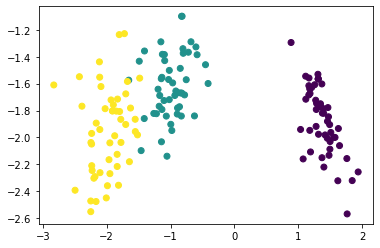

In [ ]:
plt.scatter(transform[:,0],transform[:,1],c=y)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
lda = LDA(n_components=2)

In [ ]:
transformsk = lda.fit_transform(X,y)

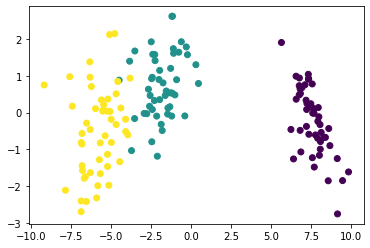

In [ ]:
plt.scatter(transformsk[:,0],transformsk[:,1]*-1,c=y)